In [2]:
import cv2
import dlib
import numpy as np
import urllib.request
from matplotlib import pyplot as plt

urllib.request.urlretrieve("https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/shape_predictor_68_face_landmarks.dat", './shape_predictor_68_face_landmarks.dat')

('./shape_predictor_68_face_landmarks.dat',
 <http.client.HTTPMessage at 0x11134fac0>)

In [3]:
frontalface_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

In [4]:
def get_landmarks(image_url):
  url_response = urllib.request.urlopen(image_url)
  img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
  image = cv2.imdecode(img_array, -1)
  faces = frontalface_detector(image, 1)
  landmarks = [(p.x, p.y) for p in landmark_predictor(image, faces[0]).parts()]
  return image,landmarks

In [5]:
def image_landmarks(image,face_landmarks):
  radius = -1
  circle_thickness = 5
  image_copy = image.copy()
  for (x, y) in face_landmarks:
    cv2.circle(image_copy, (x, y), circle_thickness, (255,0,0), radius)
  plt.imshow(image_copy, interpolation='nearest')
  plt.axis('off')
  plt.show()

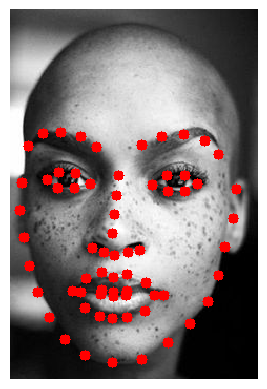

In [6]:
# https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg
image, landmarks= get_landmarks(input("Enter the URL of the image: "))
image_landmarks(image,landmarks)

In [7]:
landmark_indices = {"eyes": (36,47),
                    "nose": (27,35),
                    "mouth": (48,67),
                    "jawline": (0,17),
                    "eyebrow": (18,27)}
eye_points = np.array([36,47])
nose_points = np.array([27,35])
mouth_points = np.array([48,67])
jawline_points = np.array([0,17])
eyebrow_points = np.array([18,27])

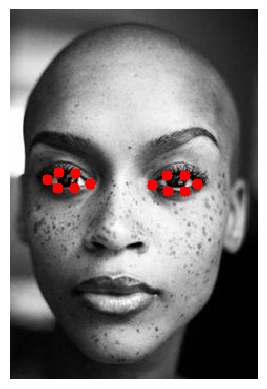

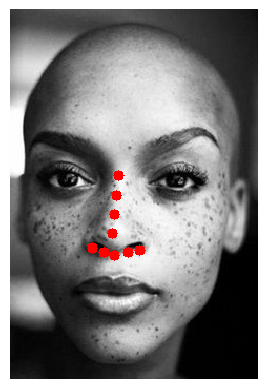

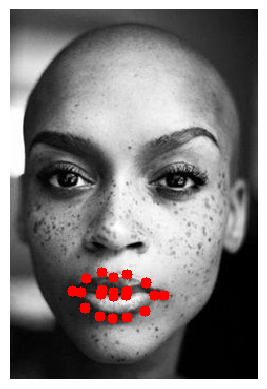

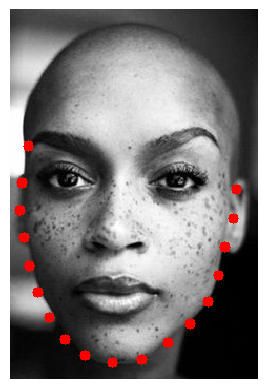

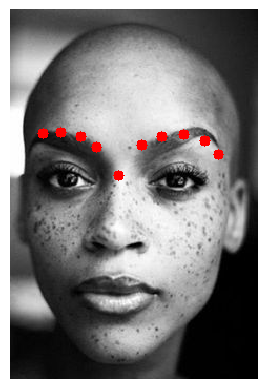

In [8]:
selected_landmarks = landmarks[eye_points[0]:eye_points[1]+1]
image_landmarks(image, selected_landmarks)

selected_landmarks = landmarks[nose_points[0]:nose_points[1]+1]
image_landmarks(image, selected_landmarks)

selected_landmarks = landmarks[mouth_points[0]:mouth_points[1]+1]
image_landmarks(image, selected_landmarks)

selected_landmarks = landmarks[jawline_points[0]:jawline_points[1]+1]
image_landmarks(image, selected_landmarks)

selected_landmarks = landmarks[eyebrow_points[0]:eyebrow_points[1]+1]
image_landmarks(image, selected_landmarks)